In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import time

In [2]:
data = pd.read_csv('creditcard_2023.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#data.drop(columns=['id'], inplace=True) 

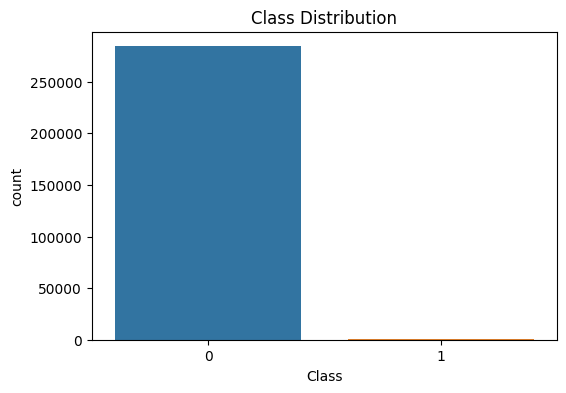

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

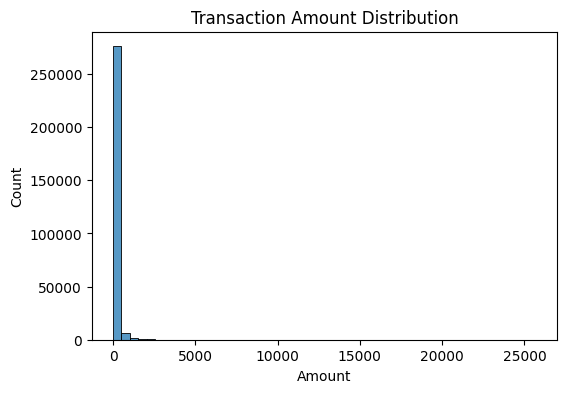

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(data['Amount'], bins=50)
plt.title('Transaction Amount Distribution')
plt.show()

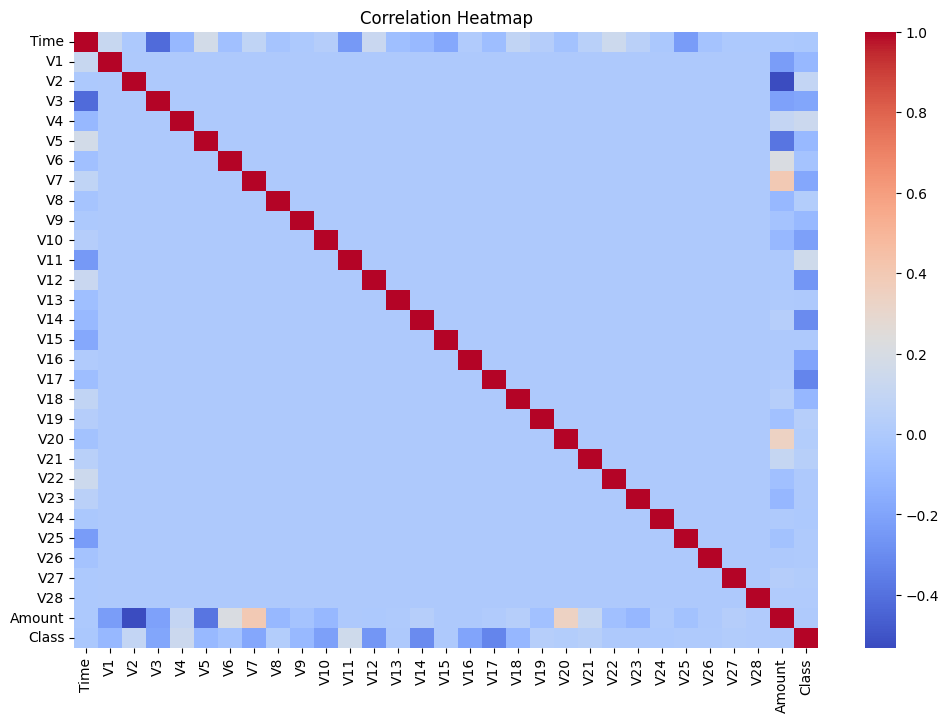

In [8]:
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

In [10]:
if 'user_id' in data.columns:
    data['Transaction_Frequency'] = data.groupby('user_id')['Amount'].transform('count')
else:
    data['Transaction_Frequency'] = 1  

if 'user_id' in data.columns:
    data['Mean_Transaction_Amount'] = data.groupby('user_id')['Amount'].transform('mean')
else:
    data['Mean_Transaction_Amount'] = data['Amount'] 

if 'Time' in data.columns:
    data['Hour'] = (data['Time'] / 3600).astype(int) % 24
    if 'user_id' in data.columns:
        data['Time_Since_Last_Transaction'] = data.groupby('user_id')['Time'].diff().fillna(0)
    else:
        data['Time_Since_Last_Transaction'] = data['Time'].diff().fillna(0)
else:
    data['Hour'] = 0 
    data['Time_Since_Last_Transaction'] = 0  

if 'Merchant_ID' in data.columns:
    data['Merchant_Transaction_Count'] = data.groupby('Merchant_ID')['Amount'].transform('count')
else:
    data['Merchant_Transaction_Count'] = 1  


In [11]:
X = data.drop('Class', axis=1)
y = data['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), ['Amount', 'Transaction_Frequency', 'Mean_Transaction_Amount', 'Hour',
                                     'Time_Since_Last_Transaction', 'Merchant_Transaction_Count'])],
    remainder='passthrough'
)

In [14]:
pca = PCA(n_components=0.95)
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', LogisticRegression(max_iter=1000))
])

random_forest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', RandomForestClassifier(random_state=42))
])

neural_network_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', MLPClassifier(random_state=42))
])

pipelines = {
    'Logistic Regression (PCA)': logistic_pipeline,
    'Random Forest (PCA)': random_forest_pipeline,
    'Neural Network (PCA)': neural_network_pipeline
}

In [ ]:
results = {}

for name, pipeline in pipelines.items():
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    start_time = time.time()
    predictions = pipeline.predict(X_test)
    predict_time = time.time() - start_time
    
    auc_roc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    report = classification_report(y_test, predictions)
    
    results[name] = {
        'classification_report': report,
        'AUC-ROC': auc_roc,
        'train_time': train_time,
        'predict_time': predict_time
    }

In [ ]:
plt.figure()
for name in results:
    fpr, tpr, _ = roc_curve(y_test, pipelines[name].predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (area = {results[name]["AUC-ROC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

for name in results:
    cm = confusion_matrix(y_test, pipelines[name].predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [ ]:
for name, result in results.items():
    print(f"{name}\n"
          f"Classification Report:\n{result['classification_report']}\n"
          f"AUC-ROC: {result['AUC-ROC']}\n"
          f"Training Time: {result['train_time']:.4f} seconds\n"
          f"Prediction Time: {result['predict_time']:.4f} seconds\n")